In [16]:
import random
import numpy as np

def generate_n_bits(n):
    return [random.randrange(2) for i in range(n)]


def generate_guess_bits(x):
    return [i if random.randrange(3) < 2 else 1-i for i in x]


def generate_noisy_prefix_sum(bits_vec):
    prefix_sum = 0
    noisy_prefix_sums = []
    for bit in bits_vec:
        prefix_sum += bit
        noisy_prefix_sums.append(prefix_sum+random.randrange(2))
    return noisy_prefix_sums

def recovery1(bits_vec, noisy_prefix_sum):
    n = len(bits_vec)
    return recovery2(bits_vec,noisy_prefix_sum,[])


def recovery2(bits_vec, noisy_prefix_sum,w):
    length = len(bits_vec)
    diff_result = [noisy_prefix_sum[0]] + noisy_prefix_sum[:-1]
    for i in range(1, length):
        diff_result[i] = noisy_prefix_sum[i] - diff_result[i]
    noises = [None for i in range(length)]
    fix_flag = [True for i in range(length)]
    result = [0 for i in range(length)]
    for i in range(length-1,-1,-1):
        if diff_result[i] == 2:
            result[i] = 1
            noises[i-1] = 0
            noises[i] = 1
        elif diff_result[i] == -1:
            result[i] = 0
            noises[i-1] = 1
            noises[i] = 0
        elif diff_result[i] == 0 and noises[i] == 1:
            result[i] = 0
            if i > 0:
                noises[i-1] = 1
        elif diff_result[i] == 1 and noises[i] == 0:
            result[i] = 1
            if i > 0:
                noises[i-1] = 0
        else:
            fix_flag[i] = False
            if w == []:
                result[i] = diff_result[i]
            else:
                result[i] = w[i]
    for i in range(length-1):
        if not fix_flag[i+1] and noises[i] != None:
            if noises[i+1] != None:
                fix_flag[i + 1] = True
                result[i + 1] = diff_result[i+1] - (noises[i+1] - noises[i])
            elif diff_result[i+1] == 0 and noises[i] == 0:
                noises[i + 1] = 0
                fix_flag[i + 1] = True
                result[i + 1] = 0
            elif diff_result[i+1] == 1 and noises[i] == 1:
                noises[i + 1] = 1
                fix_flag[i+1] = True
                result[i + 1] = 1
    return result


def test(ns, tries = 30, print_flag=False):
    means1 = []
    stddev1 = []
    means2 = []
    stddev2 = []
    for n in ns:
        recovered_fraction1 = np.array([])
        recovered_fraction2 = np.array([])
        for t in range(tries):
            x = generate_n_bits(n)
            w = generate_guess_bits(x)
            a = generate_noisy_prefix_sum(x)
            o = recovery1(x, a)
            recovered_fraction1 = np.append(recovered_fraction1,[sum([o[i] == x[i] for i in range(n)])/n])
            o = recovery2(x, a,w)
            recovered_fraction2 = np.append(recovered_fraction2,[sum([o[i] == x[i] for i in range(n)])/n])
        means1.append(round(np.mean(recovered_fraction1),4))
        stddev1.append(round(np.std(recovered_fraction1),5))
        means2.append(round(np.mean(recovered_fraction2),4))
        stddev2.append(round(np.std(recovered_fraction2),5))
    if print_flag:
        print("Recovery 1")
        print("Means:")
        print(means1)
        print("Standard Deviation:")
        print(stddev1)
        print("Recovery 2")
        print("Means:")
        print(means2)
        print("Standard Deviation:")
        print(stddev2)
    return means1, stddev1, means2, stddev2


ns = [100,500,1000,5000,10000,50000]
means1, stddev1, means2, stddev2 = test(ns,print_flag=True)

Recovery 1
Means:
[0.7673, 0.7765, 0.7775, 0.7757, 0.7771, 0.778]
Standard Deviation:
[0.0568, 0.025, 0.01158, 0.00627, 0.00491, 0.00239]
Recovery 2
Means:
[0.812, 0.8113, 0.8143, 0.8132, 0.8156, 0.8155]
Standard Deviation:
[0.04585, 0.02538, 0.01073, 0.00651, 0.00433, 0.00214]


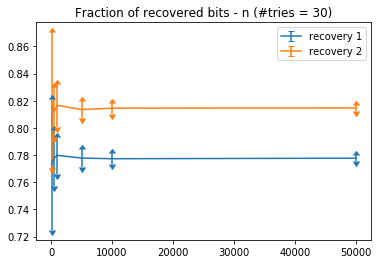

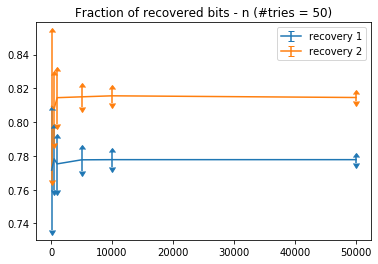

In [19]:
import matplotlib.pyplot as plt

def plot(means1, stddev1, means2, stddev2, tries):
    fig = plt.figure()
    plt.errorbar(ns, means1, yerr=stddev1, uplims=True, lolims=True,
             label='recovery 1')
    plt.errorbar(ns, means2, yerr=stddev2, uplims=True, lolims=True,
             label='recovery 2')
    plt.legend(loc='upper right')
    plt.title("Fraction of recovered bits - n (#tries = " + str(tries) + ")")
    plt.show()
plot(means1, stddev1, means2, stddev2, 30)
means1, stddev1, means2, stddev2 = test(ns,tries=50)
plot(means1, stddev1, means2, stddev2, 50)
